# Training CNN Model Template

## Details about implementation

This Model will serve as a template to train a custom CNN model.

### Importing Libraries

In [ ]:
import os
import math
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

2025-01-28 09:22:19.691127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738056139.802278   53283 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738056139.833536   53283 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from datetime import datetime

In [ ]:
# Global Variables
MODEL_NAME = "cnn_model_template"

NUM_CLASSES = 38
IMAGE_SIZE = 224
BATCH_SIZE = 32

now = datetime.now()

### Importing Dataset

In [ ]:
training_set = image_dataset_from_directory()
validation_set = image_dataset_from_directory()
test_set = image_dataset_from_directory()
normalized_training_set = training_set
normalized_validation_set = validation_set
normalized_test_set = test_set
augmented_training_set = normalized_training_set

### Training Model

#### Building Model

In [ ]:
def add_conv_block(
    model,
    filters,
    kernel_size=3,
    pool_size=2,
    strides=2,
    activation="relu",
    padding="same",
):
    """
    Adds a convolutional block to the model, consisting of:
    - Conv2D layer
    - Conv2D layer
    - MaxPooling layer

    Parameters:
        model: Sequential model to which the block is added.
        filters: Number of filters for Conv2D layers.
        kernel_size: Size of the convolutional kernel (default: 3).
        pool_size: Pool size for MaxPooling (default: 2).
        strides: Strides for MaxPooling (default: 2).
        activation: Activation function for Conv2D layers (default: 'relu').
        padding: Padding for Conv2D layers (default: 'same').
    """
    model.add(
        Conv2D(
            filters=filters,
            kernel_size=kernel_size,
            padding=padding,
            activation=activation,
        )
    )
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation=activation))
    model.add(MaxPool2D(pool_size=pool_size, strides=strides))

In [ ]:
# Initialize the model
model = Sequential()

In [ ]:
# Input layer and first convolutional block
model.add(
    Conv2D(
        filters=32,
        kernel_size=3,
        padding="same",
        activation="relu",
        input_shape=[IMAGE_SIZE, IMAGE_SIZE, 3],
    )
)
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/home/sam5io/sam_engineerings/AgroDiagnoseAI/.AgroDiagnoseAI_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Add subsequent convolutional blocks using the function
add_conv_block(model, filters=64)
add_conv_block(model, filters=128)
add_conv_block(model, filters=256)
add_conv_block(model, filters=512)

In [ ]:
# Add the fully connected layers
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=1500, activation="relu"))
model.add(Dropout(0.4))

In [ ]:
# Output Layer
model.add(Dense(units=38, activation="softmax"))

#### Compiling Model

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

#### Training Model

In [ ]:
training_history = model.fit(
    x=augmented_training_set, validation_data=normalized_validation_set, epochs=10
)

Epoch 1/10


I0000 00:00:1738056160.245349   53440 service.cc:148] XLA service 0xedea0d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738056160.245929   53440 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
I0000 00:00:1738056160.837868   53440 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/2197 ━━━━━━━━━━━━━━━━━━━━ 6:46:30 11s/step - accuracy: 0.0000e+00 - loss: 3.6383

I0000 00:00:1738056168.675446   53440 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 110s 45ms/step - accuracy: 0.2643 - loss: 2.6316 - val_accuracy: 0.7532 - val_loss: 0.7857
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 89s 41ms/step - accuracy: 0.7596 - loss: 0.7659 - val_accuracy: 0.8701 - val_loss: 0.4037
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.8602 - loss: 0.4343 - val_accuracy: 0.9049 - val_loss: 0.2901
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.8998 - loss: 0.2997 - val_accuracy: 0.9255 - val_loss: 0.2257
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.9248 - loss: 0.2281 - val_accuracy: 0.9346 - val_loss: 0.1920
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.9418 - loss: 0.1707 - val_accuracy: 0.9326 - val_loss: 0.2141
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 90s 41ms/step - accuracy: 0.9530 - loss: 0.1380 - val_accuracy: 0.9490 - val_loss: 0.1518
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 91s 41ms/step - accuracy: 0.9626 - loss: 0.1

#### Evaluating Model

In [ ]:
# Training set Accuracy
train_loss, train_acc = model.evaluate(augmented_training_set)
print("Training accuracy:", train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.9911 - loss: 0.0299
Training accuracy: 0.9914076328277588


In [ ]:
# Validation set Accuracy
val_loss, val_acc = model.evaluate(normalized_validation_set)
print("Validation accuracy:", val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9609 - loss: 0.1220
Validation accuracy: 0.9625540375709534


#### Saving Model

In [ ]:
model.save(f'../models/{MODEL_NAME}_{now.strftime("%Y_%m_%d_%I_%M_%S_%p")}.keras')

In [ ]:
# Save the training history
with open(
    f"training_histories/training_history_{MODEL_NAME}_{now.strftime("%Y_%m_%d_%I_%M_%S_%p")}.json",
    "w",
) as f:
    json.dump(training_history.history, f)

#### Model Details

##### Model Architecture

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

##### Model Performance Metrics

In [ ]:
# Get true labels
y_true = np.concatenate([y.numpy() for _, y in test_set], axis=0)

if y_true.ndim > 1:  # If it's one-hot encoded
    y_true = np.argmax(y_true, axis=1)

print(f"y_true shape: {y_true.shape}")

y_true shape: (17572,)


In [ ]:
# Predict labels using the trained model
y_pred = model.predict(normalized_test_set)

if y_pred.ndim > 1:  # If it's one-hot encoded or probabilities
    y_pred = np.argmax(y_pred, axis=1)

print(f"y_pred shape: {y_pred.shape}")

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step
y_pred shape: (17572,)


In [ ]:
# Generate the classification report
report = classification_report(
    y_true, y_pred, target_names=test_set.class_names
)

print("Classification Report:")
print(report)

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.95      0.95       504
                                 Apple___Black_rot       0.97      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.97      0.96       440
                                   Apple___healthy       0.95      0.94      0.95       502
                               Blueberry___healthy       0.87      0.98      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.91      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight      

##### Model Confusion Matrix

In [ ]:
def plot_confusion_matrix_heatmap(model, test_set, class_names):
    """
    Plots the confusion matrix as a heatmap for a given model and validation dataset.
    Uses human-readable class names for display.

    Parameters:
        model: Trained model.
        test_set: Test dataset (normalized).
        class_names: List of class names.
    """
    # Get true labels and predictions
    true_labels = np.concatenate([y for x, y in test_set], axis=0)
    predicted_probs = model.predict(test_set)

    # If true_labels are one-hot encoded, convert them to class indices
    if true_labels.ndim > 1:  # Check if one-hot encoded
        true_labels = np.argmax(true_labels, axis=1)

    # Convert predicted probabilities to class indices
    predicted_labels = np.argmax(predicted_probs, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(40, 40))
    sns.heatmap(
        cm,
        annot=True,
        annot_kws={"size": 10},
        cmap="magma",
        xticklabels=class_names,
        yticklabels=class_names,
    )

    plt.xlabel("Predicted Class", fontsize=20)
    plt.ylabel("Actual Class", fontsize=20)
    plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
    plt.show()

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step


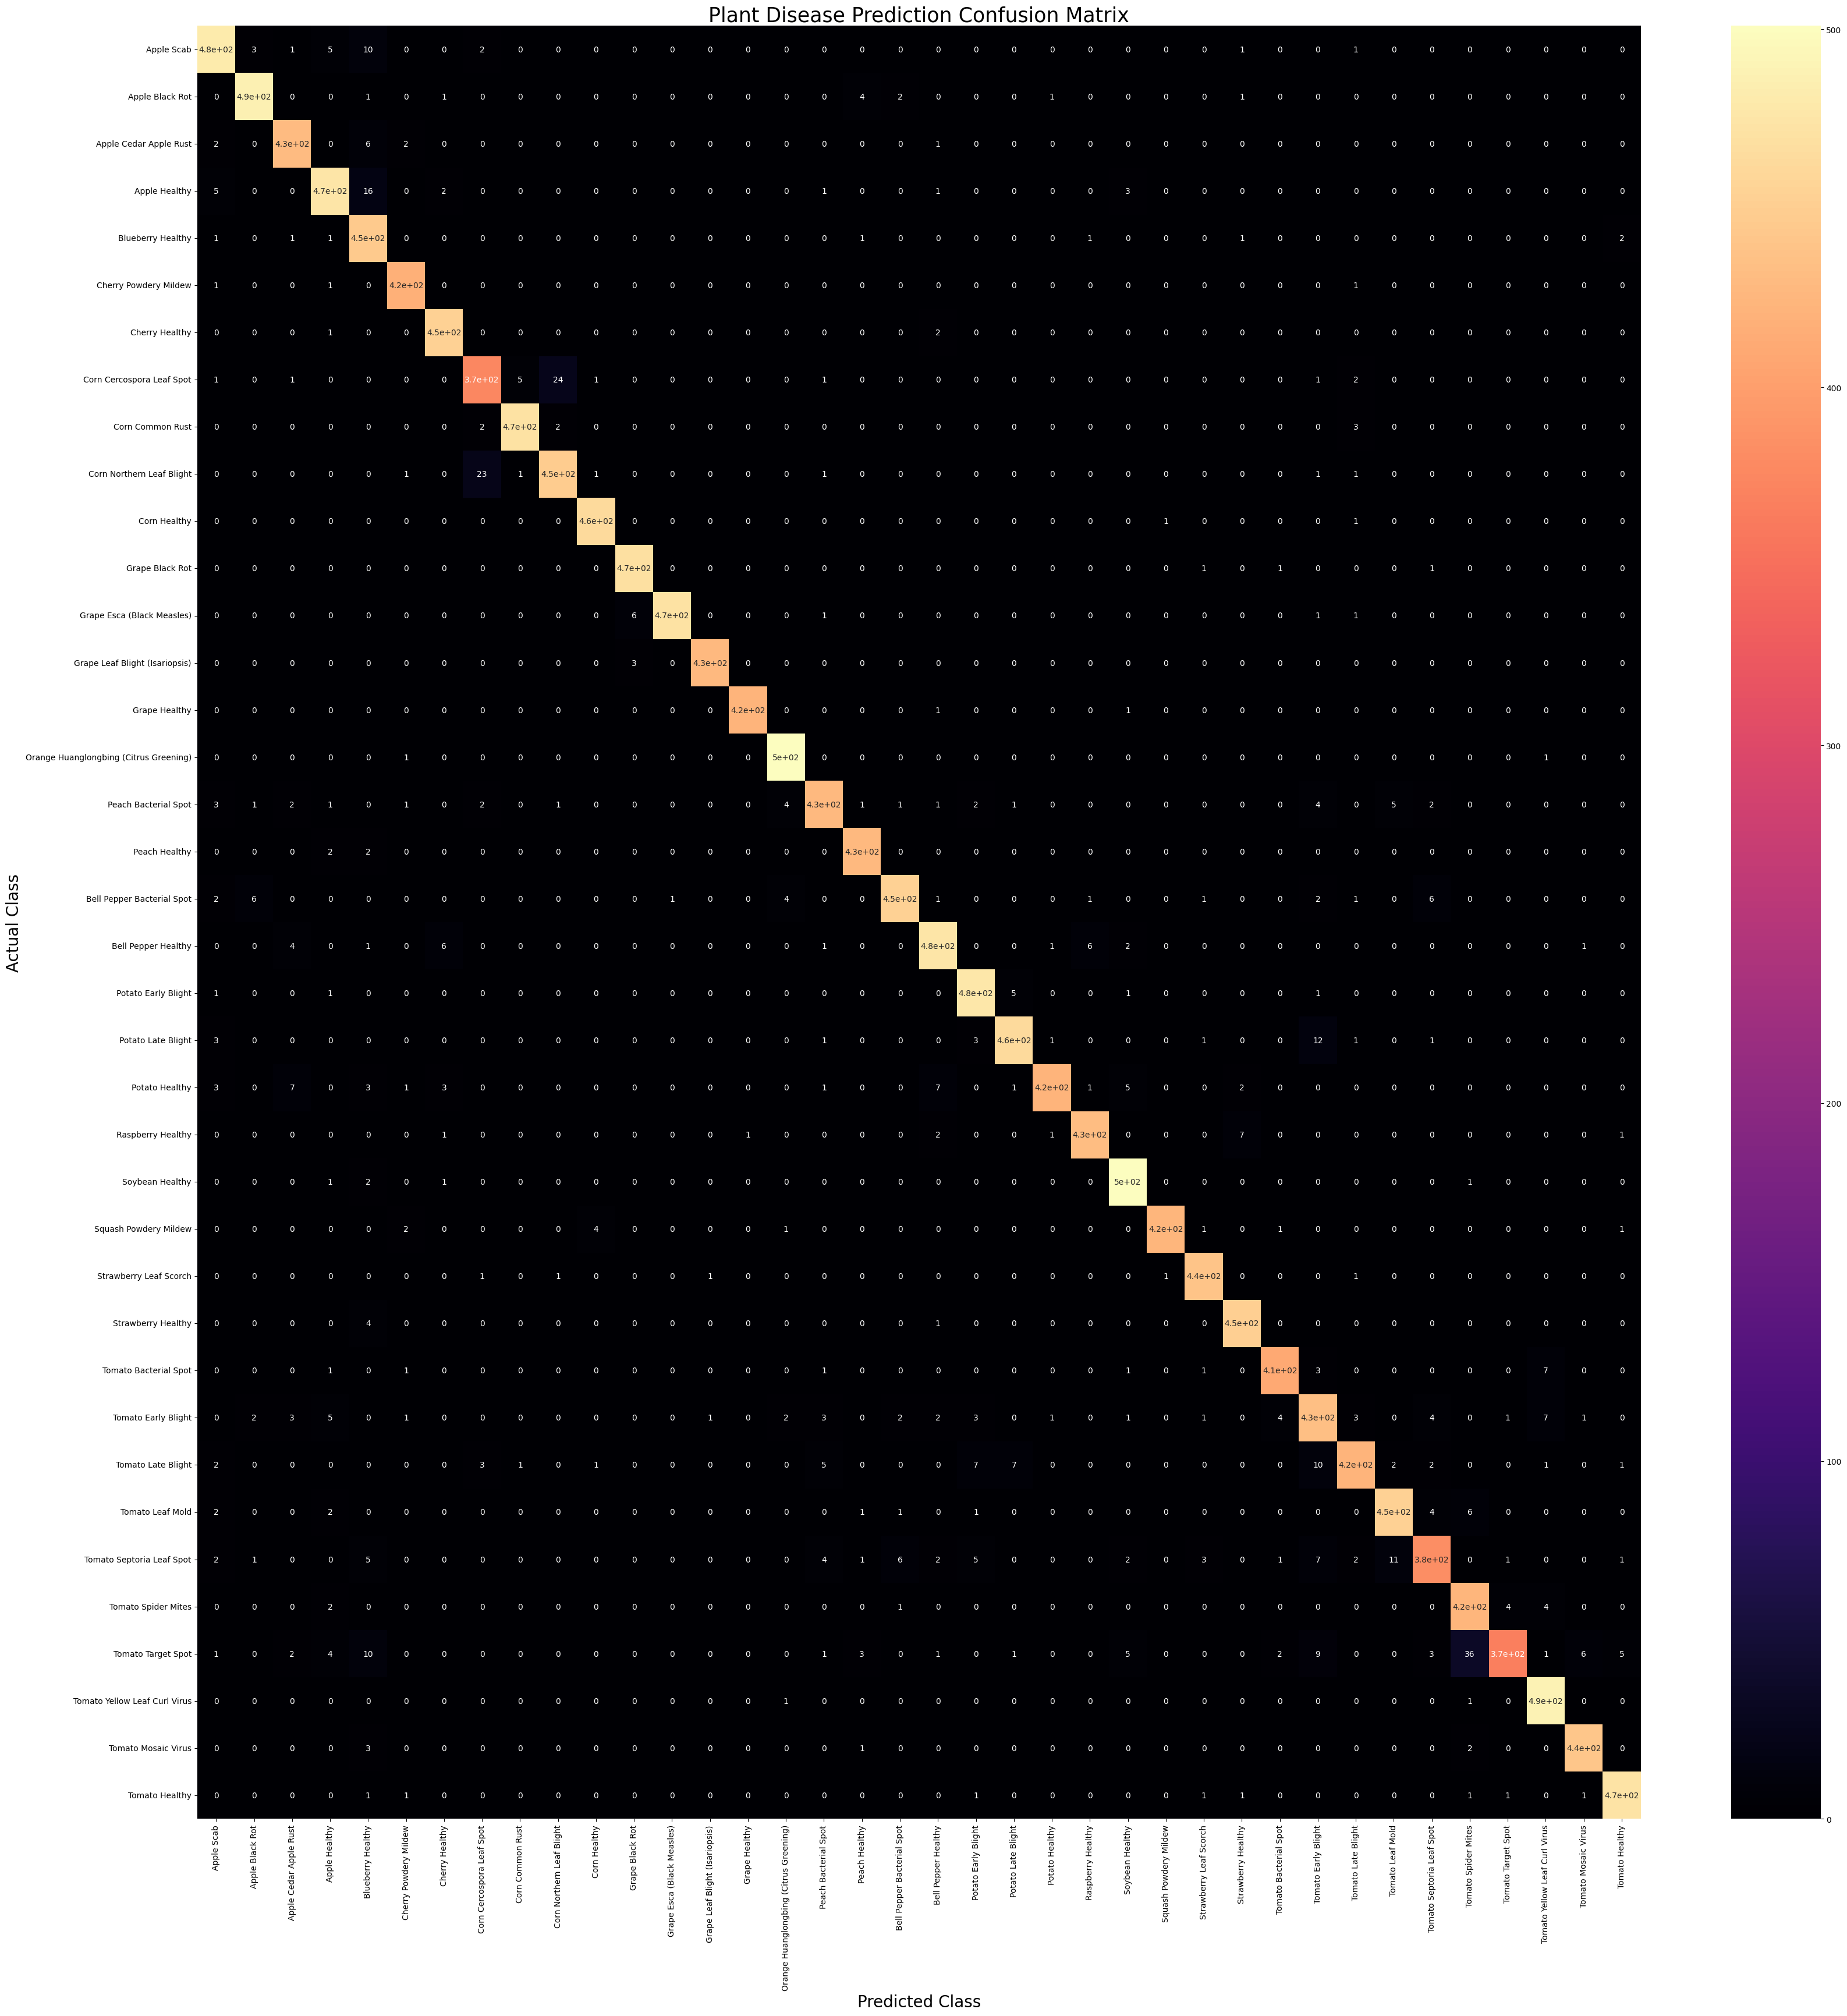

In [ ]:
plot_confusion_matrix_heatmap(model, normalized_test_set, test_set.class_names)

##### Train | Valid Accuracy & Loss graph

In [ ]:
def plot_training_history(history):
    """
    Plots training and validation accuracy and loss graphs.

    Parameters:
        history: The History object returned by model.fit().
    """
    # Extract metrics
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label="Training Accuracy")
    plt.plot(epochs, val_acc, label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

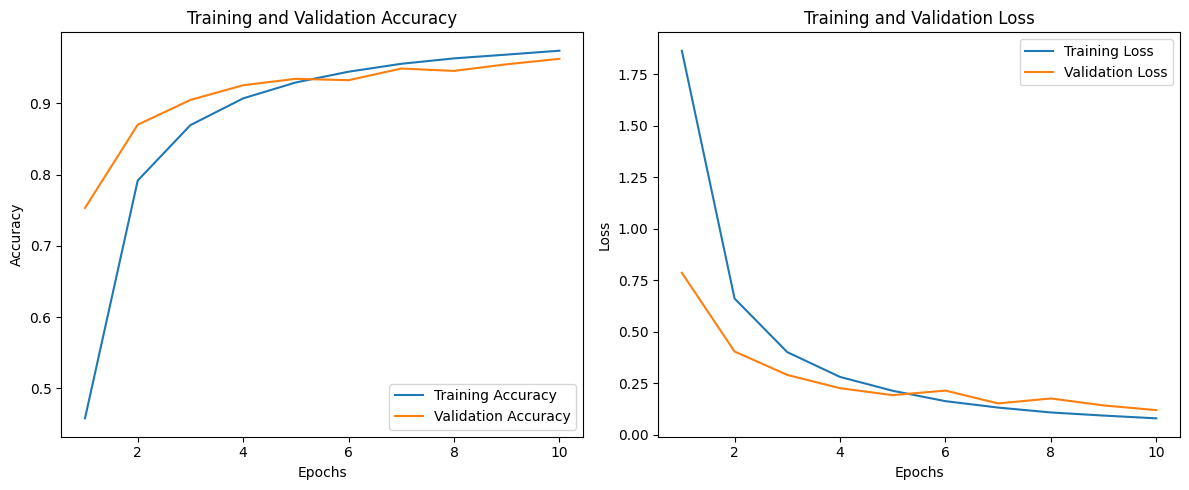

In [ ]:
# Plot the graphs
plot_training_history(training_history)

## Conclusion